تحلیل شبکه با بیش از 1000 گره (Barabási–Albert graph)

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# ساخت شبکه با 1500 گره و 3 یال برای هر گره جدید
G = nx.barabasi_albert_graph(n=4000, m=12)

# فقط بزرگ‌ترین کامپوننت همبند را در نظر بگیریم (احتیاط)
if not nx.is_connected(G):
    G = G.subgraph(max(nx.connected_components(G), key=len)).copy()

# الف) محاسبات پایه‌ای شبکه
degrees = dict(G.degree())
max_degree = max(degrees.values())
avg_degree = sum(degrees.values()) / G.number_of_nodes()
avg_path_length = nx.average_shortest_path_length(G)
diameter = nx.diameter(G)
avg_clustering = nx.average_clustering(G)

print("الف) مشخصات شبکه:")
print(f"- ماکزیمم درجه: {max_degree}")
print(f"- متوسط درجه: {avg_degree:.2f}")
print(f"- متوسط فاصله: {avg_path_length:.2f}")
print(f"- قطر شبکه: {diameter}")
print(f"- متوسط ضریب خوشه‌بندی: {avg_clustering:.4f}")


الف) مشخصات شبکه:
- ماکزیمم درجه: 418
- متوسط درجه: 23.93
- متوسط فاصله: 2.79
- قطر شبکه: 4
- متوسط ضریب خوشه‌بندی: 0.0240


نمودار توزیع درجه

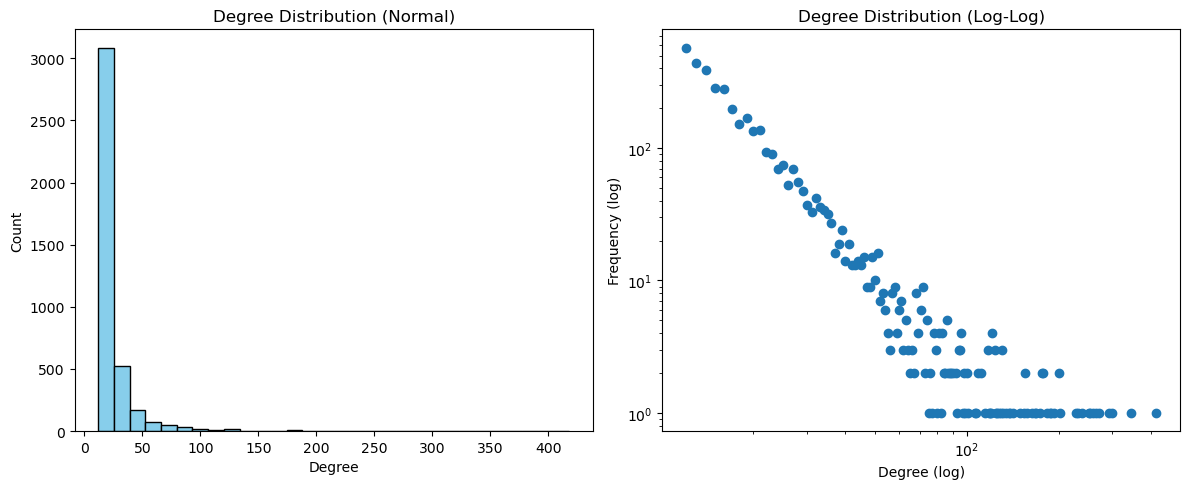

In [5]:
degree_values = list(degrees.values())

# نمودار هیستوگرام عادی
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(degree_values, bins=30, color='skyblue', edgecolor='black')
plt.title("Degree Distribution (Normal)")
plt.xlabel("Degree")
plt.ylabel("Count")

# log-log plot
plt.subplot(1, 2, 2)
degree_count = np.bincount(degree_values)
degrees_list = np.arange(len(degree_count))
plt.loglog(degrees_list[degree_count > 0], degree_count[degree_count > 0], marker='o', linestyle='None')
plt.title("Degree Distribution (Log-Log)")
plt.xlabel("Degree (log)")
plt.ylabel("Frequency (log)")

plt.tight_layout()
plt.show()


5 گره با بالاترین درجه

In [6]:
top_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:5]

print("\nج) 5 گره با بیشترین درجه:")
for node, deg in top_nodes:
    clust = nx.clustering(G, node)
    print(f"گره {node} -> درجه: {deg}, ضریب خوشه‌بندی: {clust:.4f}")



ج) 5 گره با بیشترین درجه:
گره 14 -> درجه: 418, ضریب خوشه‌بندی: 0.0201
گره 0 -> درجه: 344, ضریب خوشه‌بندی: 0.0229
گره 17 -> درجه: 299, ضریب خوشه‌بندی: 0.0218
گره 13 -> درجه: 292, ضریب خوشه‌بندی: 0.0256
گره 15 -> درجه: 270, ضریب خوشه‌بندی: 0.0233
